In [2]:
#import necessary library
import time     
import os         
import requests 
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import codecs
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency


In [ ]:
#starting crawling MAC website

url="https://www.maccosmetics.co.il"

user_agent = {'User-agent': 'Mozilla/5.0'}
response1 = requests.get(url,headers=user_agent)
m=[]
soup1 = BeautifulSoup(response1.content, "html.parser")
for item in soup1.findAll("div",attrs={"class":"site-navigation__submenu-col"}):
    m.append(item.ul)
    
    
del m[1]
del m[2]
del m[4]
links=[]
for a in m[0].find_all('a'):
    links.append(a['href'])
for a in m[1].find_all('a'):
    links.append(a['href'])
for a in m[2].find_all('a'):
    links.append(a['href'])
for a in m[3].find_all('a'):
    links.append(a['href'])
for a in m[4].find_all('a'):
    links.append(a['href'])


In [ ]:
#html proudct parsing
url="https://www.maccosmetics.co.il"
linkstoprod=[]
user_agent = {'User-agent': 'Mozilla/5.0'}
for line in links:
    response1 = requests.get(url+line,headers=user_agent)
    soup1 = BeautifulSoup(response1.content, "html.parser")
    mtag=soup1.findAll("a",attrs={"class":"product__image-medium-link js-product__link-to-spp js-product-image"})
    linksToPages=[t['href'] for t in mtag]
    for h in linksToPages:
        linkstoprod.append(h)
    time.sleep(30)

In [ ]:
#links saving
textfile = open("a_file2.txt", "w", encoding="utf-8")
for element in linkstoprod:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
#check for duplicates
a_set = set(linkstoprod)
contains_duplicates = len(linkstoprod) != len(a_set)
print(contains_duplicates)

linkstoprod = list(dict.fromkeys(linkstoprod))
for line in linkstoprod[1:2]:
    print(line)
    
a_set = set(linkstoprod)
contains_duplicates = len(linkstoprod) != len(a_set)
print(contains_duplicates)



In [ ]:
#parsing individual product
url13="https://www.maccosmetics.co.il"
price=[]
ammount=[]
title=[]
web=[]
product=[]
replace_name={'פנים':'Face','עיניים':'Eye','שפתיים':'lipsticks','מברשות':'Brush'}
shadefinal = []
for line in linkstoprod:
    shade=[]
    response2 = requests.get(url13+line,headers=user_agent)
    soup2 = BeautifulSoup(response2.content, "html.parser")
    try :
        tagprice=soup2.find("div",attrs={"class":"product-price-v1 js-product-price-v1"})
        price.append(tagprice.text.strip())
        price.append("\n")
    except :
        price.append("None")
    try:
        tagamount=soup2.find("div",attrs={"class":"product-full__size js-product-full-size"})
        ammount.append(tagamount.text.strip())
        ammount.append("\n")
    except :
        ammount.append("None")
    try:
        tagname=soup2.find("div",attrs={"class":"product-full__title"})
        title.append(tagname.text.strip())
        title.append("\n")
    except :
        title.append("None")
    try:
        tagshade=soup2.find("div",attrs={"class":"product-full__shades js-spp-shades product-full-shades-v1 js-product-full-shades"})
        shade.append(tagshade.text)
        shadefin=shade[0].replace('\n', ' ').replace('   ','  ').replace('  ',', ').replace(', ,',',').replace(' ','')
        shade=shadefin.split(",")
        for string in shade:
            if (string != ""):
                shadefinal.append(string)
        shadefinal.append("\n")
    except :
        shadefinal.append("None") 
    try :
        web.append("MAC")
        web.append("\n")
    except :
        price.append("None")
    try :
        tagproduct=soup2.find("a",attrs={"class":"site-navigation__link js-subMenu-link active"})
        product.append(tagprice.text)
        product.append("\n")
    except :
        product.append("None")
    time.sleep(30)
    
product=product[0:4]
replacement = (pd.Series(product)).map(replace_name) 
product = list(replacement)

In [ ]:
#saving elements to file

textfile = open("a_file_price.txt", "w", encoding="utf-8")
for element in price:
    textfile.write(element + "\n")
textfile.close()

textfile = open("a_file_ammount.txt", "w", encoding="utf-8")
for element in ammount:
    textfile.write(element + "\n")
textfile.close()

textfile = open("a_file_shade.txt", "w", encoding="utf-8")
for element in shadefinal:
    textfile.write(element + "\n")
textfile.close()

textfile = open("a_file_title.txt", "w", encoding="utf-8")
for element in title:
    textfile.write(element + "\n")
textfile.close()

textfile = open("a_file_pro.txt", "w", encoding="utf-8")
for element in product:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
#starting crawling bobbi brown website
url1="https://www.bobbibrown.co.il"
linkstoprod=[]
user_agent = {'User-agent': 'Mozilla/5.0'}
response1 = requests.get(url1,headers=user_agent)
soup1 = BeautifulSoup(response1.content, "html.parser")
for item in soup1.findAll("div",attrs={"class":"gnav-section__link-wrapper js-link-wrapper js-analytics-lnk-wrap"}):
    for a_elm in item.find_all("a"):
        linkstoprod.append(a_elm.attrs["href"])
linksfinal=linkstoprod[2]

In [ ]:
#html proudct parsing
url1="https://www.bobbibrown.co.il"
linkstoallprod=[]
user_agent = {'User-agent': 'Mozilla/5.0'}
response1 = requests.get(url1+linksfinal,headers=user_agent)
soup1 = BeautifulSoup(response1.content, "html.parser")
for item in soup1.findAll("div",attrs={"class":"product-brief__image-wrapper"}):
    for a_elm in item.find_all("a"):
        linkstoallprod.append(a_elm.attrs["href"])

In [ ]:
#remove duplicates
a_set = set(linkstoallprod)
contains_duplicates = len(linkstoallprod) != len(a_set)
print(contains_duplicates)

linkstoallprod = list(dict.fromkeys(linkstoallprod))



In [ ]:
#cheking product by color
url13="https://www.bobbibrown.co.il/product/2321/79631/luxe-defining-lipstick#/shade/Avant_Gardenia"
response2 = requests.get(url13,headers=user_agent)
soup2 = BeautifulSoup(response2.content, "html.parser")
color=[]
for col in soup2.find_all("div",attrs={"class":"product-full-shades__shade-swatch"}):
    color.append(col.get('style'))    

In [ ]:
#parsing individual product
url1="https://www.bobbibrown.co.il"
price=[]
ammount=[]
title=[]
shadefinal = []
web=[]
product=[]
replace_name2={'פנים':'Face','עיניים':'Eye','שפתיים':'lipsticks'}
for line in linkstoallprod:
    shade=[]
    response2 = requests.get(url13+line,headers=user_agent)
    soup2 = BeautifulSoup(response2.content, "html.parser")
    try :
        tagprice=soup2.find("span",attrs={"class":"price js-sku-price new_price js-new_price"})
        price.append(tagprice.text.strip())
        price.append("\n")
    except :
        price.append("None")
    try:
        tagamount=soup2.find("div",attrs={"class":"product-full__size"})
        ammount.append(tagamount.text.strip())
        ammount.append("\n")
    except :
        ammount.append("None")
    try:
        tagname=soup2.find("h1",attrs={"class":"product-full__title"})
        title.append(tagname.text.strip())
        title.append("\n")
    except :
        title.append("None")
    try:
        web.append('Bobbi Brown')
        web.append("\n")
    except :
        web.append("None")
    try:
        tagpro=soup2.find("span",attrs={"class":"gnav-section__link-wrapper__inner js-analytics-gnav-sec-link-wrap"})
        product.append(tagpro.text)
        product.append("\n")
    except :
        product.append("None")    
    try:
        for col in soup2.find_all("div",attrs={"class":"product-full-shades__shade-swatch"}):
            shadefinal.append(col.get('style'))
        shadefinal.append("\n")
    except :
        shadefinal.append("None")      
    time.sleep(30)
linkstoprod=linkstoprod[0:3]
replacement2 = (pd.Series(product)).map(replace_name) 
product = list(replacement2)

In [ ]:
#saving elements to file
for element in title:
    textfile.write(element + "\n")
textfile.close()
textfile = open("a_file_shadebobi.txt", "w", encoding="utf-8")
for element in shadefinal:
    textfile.write(element + "\n")
textfile.close()
textfile = open("a_file_ammountbobi.txt", "w", encoding="utf-8")
for element in ammount:
    textfile.write(element + "\n")
textfile.close()
textfile = open("a_file_pricebobi.txt", "w", encoding="utf-8")
for element in price:
    textfile.write(element + "\n")
textfile.close()
textfile = open("a_file_prodbobi.txt", "w", encoding="utf-8")
for element in product:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
#delete all new lines 
title1=[]
for row in title:
    if row !='\n':
        title1.append(row)
    else: pass
    
price1=[]
for row in price:
    if row !='\n':
        price1.append(row)
    else: pass 

ammount1=[]
for row in ammount:
    if row !='\n':
        ammount1.append(row)
    else: pass
    
web1=[]
for row in ammount:
    if row !='\n':
        web1.append(row)
    else: pass     
    
product1=[]
for row in product1:
    if row !='\n':
        product1.append(row)
    else: pass     

In [ ]:
#creating data for dataframe mac
data = {'title':  title1 , 'price': price1, 'ammount' : ammount1, 'web':web1 ,'product':product1} 

In [ ]:
#opening parsed file for bobbi brown
amm = codecs.open("a_file_ammountbobi.txt", "r", "utf-8")
pri = codecs.open("a_file_pricebobi.txt", "r", "utf-8")
titl = codecs.open("a_file_titlebobi.txt", "r", "utf-8")
prod = codecs.open("a_file_prodbobi.txt", "r", "utf-8")

In [ ]:
#moving data for file list
ammbob=[]
for x in amm:
    ammbob.append(x)
pribob=[]
for x in pri:
    pribob.append(x)
titlbob=[]
for x in titl:
    titlbob.append(x)
prodbob=[]
for x in prod:
    prodbob.append(x)    

In [ ]:
#creating data for dataframe- bobbi brown
data2 = {'title':  titlbob , 'price': pribob, 'ammount' : ammbob,'web':web,'product':prodbob} 

In [ ]:
#creating dataframe
df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

In [ ]:
#combining the dataframe
dffin=df.append(df2, ignore_index = True)

In [ ]:
#saving the dataframe to file
dffin.to_csv('ALLDATA1.csv', encoding='utf-8')

In [3]:
df = pd.read_csv('ALLDATA1.csv')

In [ ]:
#to see all the dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

Text(0, 0.5, 'frequency')

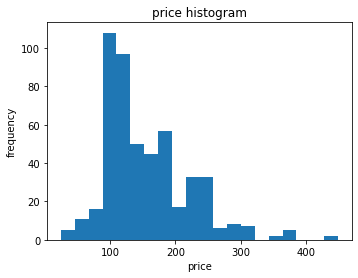

In [36]:
#visual data
fig=plt.figure(figsize=(12,4))

fig1=fig.add_subplot(1,2,1)

fig1.hist(df.price,bins=20)
fig1.set_title('price histogram')
fig1.set_xlabel('price')
fig1.set_ylabel('frequency')


In [7]:
ct1=pd.crosstab(df['price'],df['ammount'])
ct1

ammount,0.00,0.09,0.33,0.35,0.50,0.70,0.90,0.95,1.00,1.15,...,38.00,40.00,50.00,80.00,90.25,95.00,98.00,100.00,120.00,150.00
price,,,,,,,,,,,,,,,,,,,,,
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#visual stats
chi2_contingency(ct1)

(13686.063461752583,
 3.0472845389034016e-136,
 9792,
 array([[0.06772908, 0.00398406, 0.00398406, ..., 0.07171315, 0.00796813,
         0.01195219],
        [0.10159363, 0.0059761 , 0.0059761 , ..., 0.10756972, 0.01195219,
         0.01792829],
        [0.37250996, 0.02191235, 0.02191235, ..., 0.39442231, 0.0438247 ,
         0.06573705],
        ...,
        [0.13545817, 0.00796813, 0.00796813, ..., 0.14342629, 0.01593625,
         0.02390438],
        [0.03386454, 0.00199203, 0.00199203, ..., 0.03585657, 0.00398406,
         0.0059761 ],
        [0.06772908, 0.00398406, 0.00398406, ..., 0.07171315, 0.00796813,
         0.01195219]]))

<AxesSubplot:xlabel='price', ylabel='ammount'>

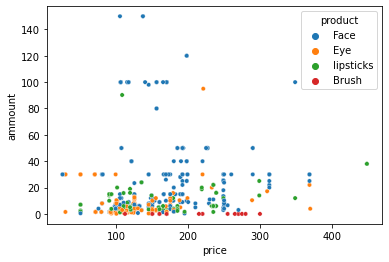

In [10]:
#visual data
sns.scatterplot(x='price',y='ammount',s=19,hue= 'product',data= df)

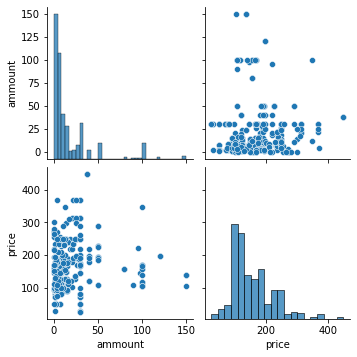

In [11]:
sns.pairplot(df[['ammount','price','web','product']])

In [12]:
#convert categorical variable for start the prediction
replace_name={'MAC':1,'Bobbi Brown':2,'Face':0,'Brush':1,'Eye':2,'lipsticks':3}
df_copy=df[["web","product","ammount","price"]].copy()
df_copy.replace(replace_name,inplace=True)

In [13]:
#creating a matrix X that will contain the only the features, and a vector y with all the labels
TRAINING_FEATURES = df_copy.columns[df_copy.columns != 'price']
TARGET_FEATURE    = 'price'

X = df_copy[TRAINING_FEATURES]
y = df_copy[TARGET_FEATURE]

In [14]:
#splitting the data to our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #502
Number of training samples: #401
Number of test samples: #101

Target distribution in original dataset:
93     30
249    17
119    17
125    17
115    13
       ..
221     1
188     1
190     1
215     1
111     1
Name: price, Length: 103, dtype: int64

Target distribution in the training set:
93     22
125    16
249    14
119    14
116     9
       ..
221     1
137     1
219     1
215     1
111     1
Name: price, Length: 98, dtype: int64

Target distribution in the test set:
93     8
50     5
115    4
150    4
192    4
135    3
249    3
156    3
119    3
235    3
166    3
170    3
313    2
189    2
185    2
106    2
180    2
149    2
105    2
110    2
116    2
169    2
227    1
101    1
108    1
100    1
370    1
239    1
349    1
369    1
225    1
117    1
219    1
250    1
130    1
198    1
92     1
179    1
137    1
147    1
280    1
155    1
220    1
159    1
290    1
238    1
310    1
91     1
114    1
188    1
193    1
195    1
260    1
199    1
8

In [15]:
#maps the values into the standrad distribution
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
#checking the X_train
print("Mean: ", X_train_scaled.mean(axis=0))
print("Standard Deviation: ", X_train_scaled.std(axis=0))

Mean:  [-1.04100713e-16 -2.87938141e-17  1.09637984e-16]
Standard Deviation:  [1. 1. 1.]


In [17]:
#applying on the test set
X_test_scaled = scaler.transform(X_test)
print("Mean: ", X_test_scaled.mean(axis=0))
print("Standard Deviation: ", X_test_scaled.std(axis=0))

Mean:  [ 0.09350008 -0.06816234  0.35141584]
Standard Deviation:  [1.06054848 1.03094053 1.38231558]


In [19]:
#apply the train function fit
clf_model = LogisticRegression().fit(X_train, y_train)
y_pred=clf_model.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#compare the predicted labels, to the actual labels provided by y_test
resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

resDF["correct"]=abs((resDF["Actual"]^resDF["Predicted"])-1)
resDF[resDF["correct"]==1]
#resDF
print("correct %:",len(resDF[resDF["correct"] == 1]) / len(resDF))

correct %: 0.12871287128712872


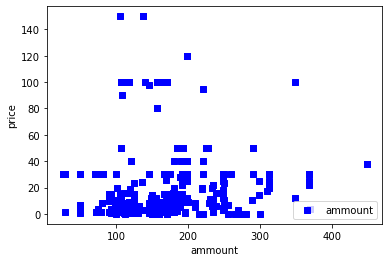

In [23]:
#visualize the data with a scatter plot
plt.scatter(x=df_copy['price'],y=df_copy['ammount'],c='b',marker='s',label='ammount')

plt.legend(numpoints=1,loc=4)
plt.xlabel('ammount')
plt.ylabel('price')
plt.show()

In [24]:
# build linear regression model
m=linear_model.LinearRegression().fit(df_copy.iloc[:,0:1],df_copy.iloc[:,3:])

In [25]:
#Investigate the model
print("b1:",m.coef_)
print("b0:",m.intercept_)

b1: [[32.24100661]]
b0: [115.71064734]


In [26]:
#Evaluation metrics for linear regression
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(df_copy.price.tolist(),m.predict(df_copy.iloc[:,0:1]).flatten())

print(SSE)

2150607.035553377


In [27]:
#trying another method - R2
from sklearn.metrics import r2_score

r2_score(df_copy.price.tolist(),m.predict(df_copy.iloc[:,0:1]).flatten())

0.03961124743185207

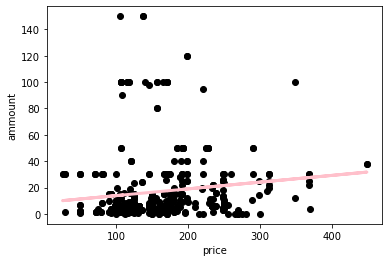

Slope: [[0.05106437]]
Intercept: [8.79361922]
R2: 0.01882882015553955


In [28]:
#checking the connection between price and amount
lr_radio = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df_copy['price'].values.reshape(df_copy['price'].shape[0],1)
y = df_copy['ammount'].values.reshape(df_copy['ammount'].shape[0],1)

lr_radio.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_radio.predict(x), color='pink', linewidth=3)

plt.xlabel('price')
plt.ylabel('ammount')
plt.show()

print("Slope:",lr_radio.coef_)
print("Intercept:",lr_radio.intercept_)
print("R2:",lr_radio.score(x,y))